In [1]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
penguins = penguins.dropna()


In [2]:
#Split de de dataset in twee
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [3]:
# Traint de train set
features= ['flipper_length_mm']
dt = DecisionTreeRegressor(max_depth = 2)
dt.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=2)

In [4]:
def plot_tree_regression(model, features):
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph 

In [5]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [6]:
predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 376.578459181854
RMSE on test set 446.4270328732305


De test RMSE is hoger, wat ook verwacht is. Dit komt omdat een groter getal betekent dat de verwachte data meer uitwijkt van de echte data. De training dataset wordt getrained om het accurater te maken.

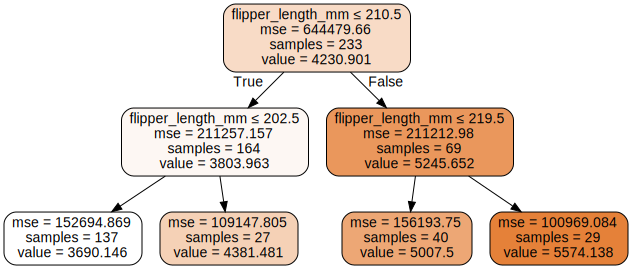

In [7]:
plot_tree_regression(dt, features)